In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Constants
g = 9.81  # gravity (m/s^2)
alpha = np.radians(30)  # slope of the incline in radians
r = 0.1  # radius of the spheres (m)
m = 1.0  # mass of the spheres (kg)
h = 5.0  # height of the slope (m)

# Time parameters
dt = 0.01  # time step (s)
duration = 2.0  # duration of simulation (s)

# Moments of inertia
I_b = 2/5 * m * r**2  # Solid sphere
I_d = 2/3 * m * r**2  # Hollow sphere

In [57]:
def calculate_energies(Vx, w, I, yc, m, g):
    PE = m * g * yc
    KE_translational = 0.5 * m * Vx**2
    KE_rotational = 0.5 * I * w**2
    KE = KE_translational + KE_rotational
    TE = PE + KE
    return PE, KE, TE

In [58]:
# Modified update_state function to use the midpoint method
def update_state_midpoint(Sx, Vx, beta, w, I):
    # Step 1: Calculate initial acceleration and angular acceleration
    a_initial = g * np.sin(alpha) / (1 + I / (m * r**2))
    eps_initial = a_initial / r

    # Step 2: Update to midpoint values for velocity and angular velocity
    Vx_mid = Vx + a_initial * dt / 2
    w_mid = w + eps_initial * dt / 2

    # Step 3: Calculate acceleration and angular acceleration at midpoint
    a_mid = g * np.sin(alpha) / (1 + I / (m * r**2))
    eps_mid = a_mid / r

    # Step 4: Update actual state using midpoint values
    Sx += Vx_mid * dt
    Vx += a_mid * dt
    beta += w_mid * dt
    w += eps_mid * dt

    # Calculate x and y components of the position
    xc = Sx * np.cos(alpha)
    yc = h - Sx * np.sin(alpha)

    # Calculate energies
    PE, KE, TE = calculate_energies(Vx, w, I, yc, m, g)

    return Sx, Vx, beta, w, a_mid, eps_mid, xc, yc, PE, KE, TE


# Function to run the simulation with the midpoint method
def run_simulation_midpoint(I):
    time_steps = int(duration / dt)
    data = np.zeros((time_steps, 12))

    Sx = Vx = beta = w = 0

    for i in range(time_steps):
        t = i * dt
        Sx, Vx, beta, w, a, eps, xc, yc, PE, KE, TE = update_state_midpoint(Sx, Vx, beta, w, I)
        data[i] = [t, Sx, Vx, beta, w, a, eps, xc, yc, PE, KE, TE]

    return pd.DataFrame(data, columns=["t", "Sx", "Vx", "beta", "w", "a", "eps", "xc", "yc", "PE", "KE", "TE"])

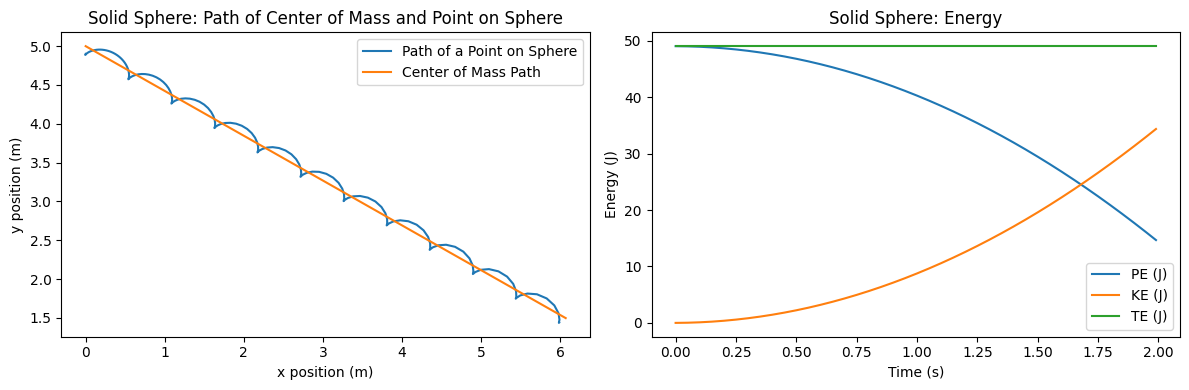

In [59]:
# Running the simulation for solid sphere using midpoint method 
df_solid_midpoint = run_simulation_midpoint(I_b)

# Calculate the x and y coordinates of a specific point on the solid sphere's surface as it rolls down the incline
df_solid_midpoint['point_x'] = df_solid_midpoint['xc'] - r * np.sin(df_solid_midpoint['beta'])
df_solid_midpoint['point_y'] = df_solid_midpoint['yc'] - r * np.cos(df_solid_midpoint['beta'])

# Plotting the result for the solid sphere
plt.figure(figsize=(12, 4))

# Solid Sphere Path
plt.subplot(1, 2, 1)
plt.plot(df_solid_midpoint['point_x'], df_solid_midpoint['point_y'], label='Path of a Point on Sphere')
plt.plot(df_solid_midpoint['xc'], df_solid_midpoint['yc'], label='Center of Mass Path')
plt.title('Solid Sphere: Path of Center of Mass and Point on Sphere')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.legend()

# Solid Sphere Energy
plt.subplot(1, 2, 2)
plt.plot(df_solid_midpoint["t"], df_solid_midpoint["PE"], label='PE (J)')
plt.plot(df_solid_midpoint["t"], df_solid_midpoint["KE"], label='KE (J)')
plt.plot(df_solid_midpoint["t"], df_solid_midpoint["TE"], label='TE (J)')
plt.title('Solid Sphere: Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend()

plt.tight_layout()
plt.show()

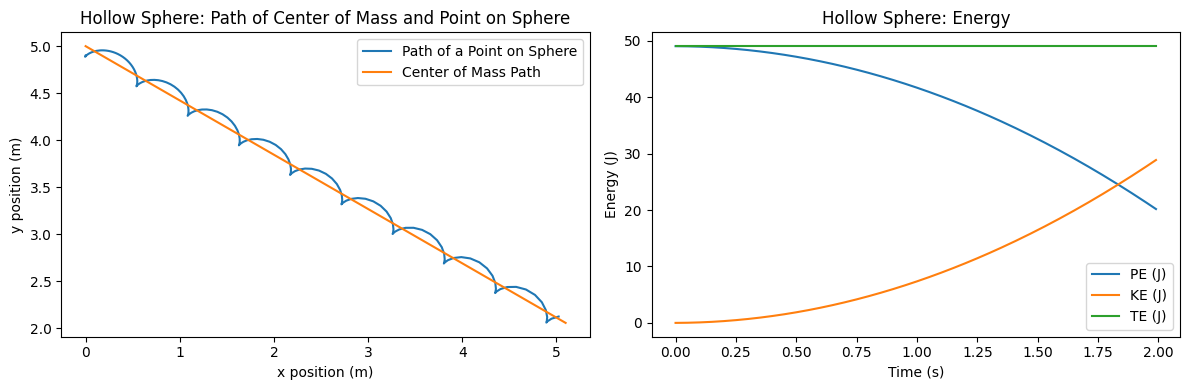

In [60]:
# Running the simulation for hollow sphere using midpoint method 
df_hollow_midpoint = run_simulation_midpoint(I_d)

# Calculate the x and y coordinates of a specific point on the hollow sphere's surface as it rolls down the incline
df_hollow_midpoint['point_x'] = df_hollow_midpoint['xc'] - r * np.sin(df_hollow_midpoint['beta'])
df_hollow_midpoint['point_y'] = df_hollow_midpoint['yc'] - r * np.cos(df_hollow_midpoint['beta'])

# Plotting the result for the hollow sphere
plt.figure(figsize=(12, 4))

# Hollow Sphere Path
plt.subplot(1, 2, 1)
plt.plot(df_hollow_midpoint['point_x'], df_hollow_midpoint['point_y'], label='Path of a Point on Sphere')
plt.plot(df_hollow_midpoint['xc'], df_hollow_midpoint['yc'], label='Center of Mass Path')
plt.title('Hollow Sphere: Path of Center of Mass and Point on Sphere')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.legend()

# Hollow Sphere Energy
plt.subplot(1, 2, 2)
plt.plot(df_hollow_midpoint["t"], df_hollow_midpoint["PE"], label='PE (J)')
plt.plot(df_hollow_midpoint["t"], df_hollow_midpoint["KE"], label='KE (J)')
plt.plot(df_hollow_midpoint["t"], df_hollow_midpoint["TE"], label='TE (J)')
plt.title('Hollow Sphere: Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend()

plt.tight_layout()
plt.show()